In [1]:
pip install pandas numpy scipy matplotlib seaborn

In [2]:
pip install pandas numpy matplotlib seaborn

<ipython-input-3-b1dd01ff2870>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df['Sales'].resample('M').sum()  # Monthly trend
<ipython-input-3-b1dd01ff2870>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_trend = df['Sales'].resample('Y').sum()  # Yearly trend


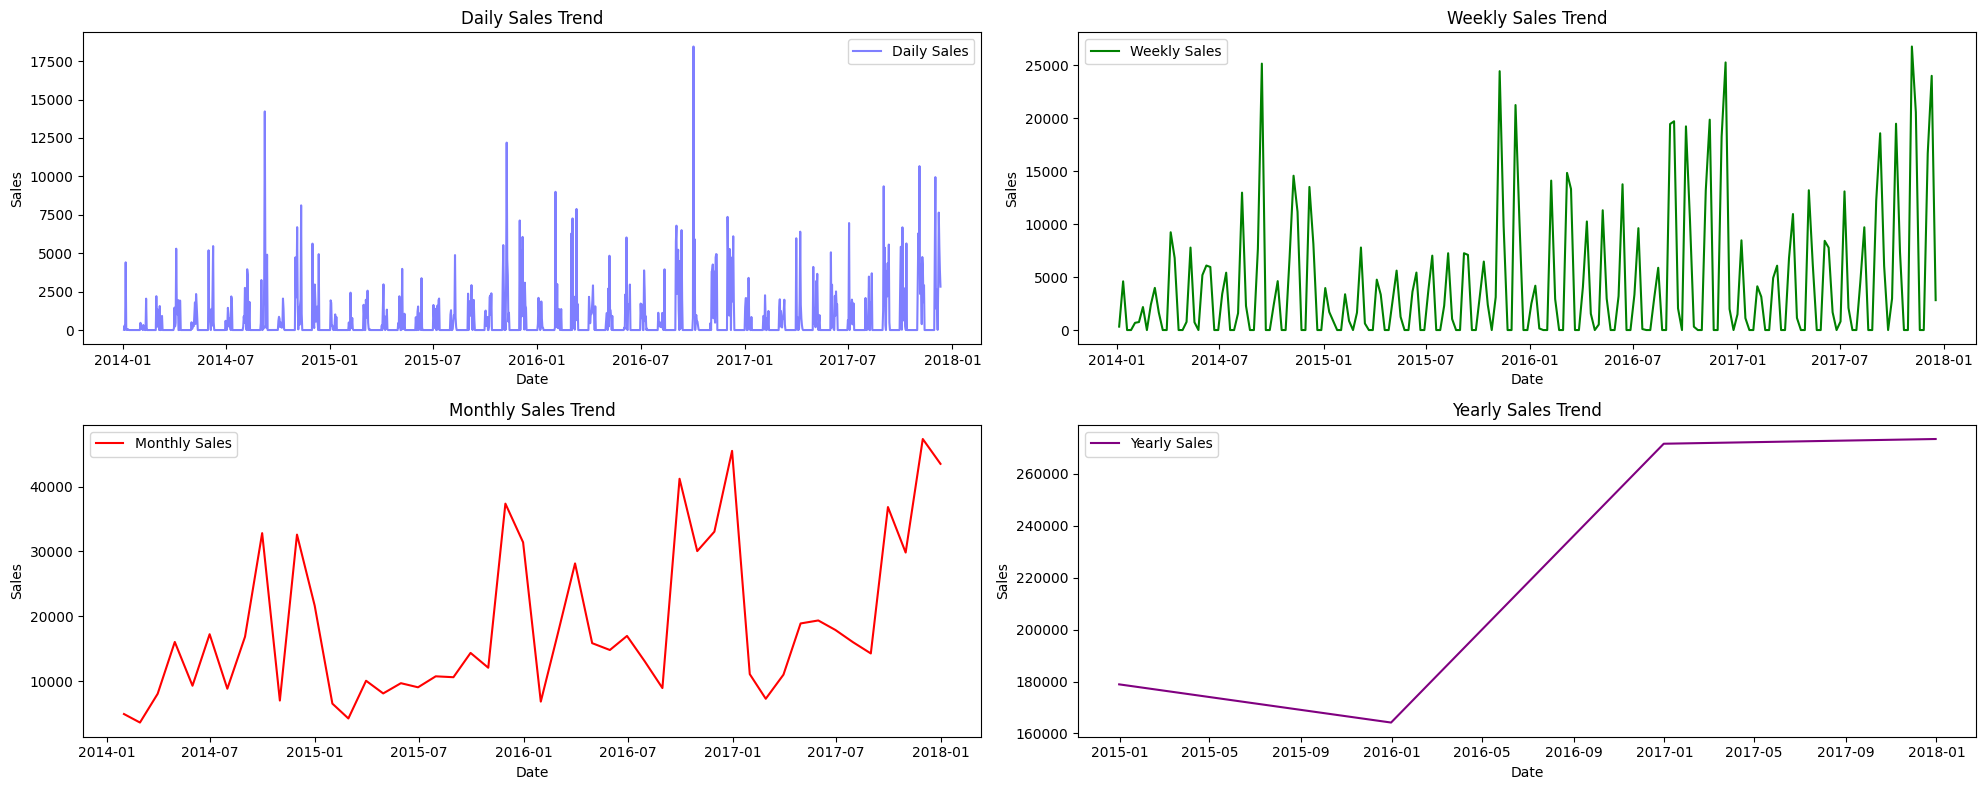


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1241  , p=0.2891  , df_denom=9990, df_num=1
ssr based chi2 test:   chi2=1.1245  , p=0.2890  , df=1
likelihood ratio test: chi2=1.1244  , p=0.2890  , df=1
parameter F test:         F=1.1241  , p=0.2891  , df_denom=9990, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5745  , p=0.5630  , df_denom=9987, df_num=2
ssr based chi2 test:   chi2=1.1497  , p=0.5628  , df=2
likelihood ratio test: chi2=1.1496  , p=0.5628  , df=2
parameter F test:         F=0.5745  , p=0.5630  , df_denom=9987, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3881  , p=0.7616  , df_denom=9984, df_num=3
ssr based chi2 test:   chi2=1.1650  , p=0.7614  , df=3
likelihood ratio test: chi2=1.1650  , p=0.7614  , df=3
parameter F test:         F=0.3881  , p=0.7616  , df_denom=9984, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3382  , p=0.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = "Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Ensure the data is sorted by date
df = df.sort_values(by='Order Date')

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample data for different trends
daily_trend = df['Sales'].resample('D').sum()  # Daily trend
weekly_trend = df['Sales'].resample('W').sum()  # Weekly trend
monthly_trend = df['Sales'].resample('M').sum()  # Monthly trend
yearly_trend = df['Sales'].resample('Y').sum()  # Yearly trend

# Plot the trends
plt.figure(figsize=(20, 8))

# Daily Trend
plt.subplot(2, 2, 1)
plt.plot(daily_trend, label="Daily Sales", color='blue', alpha=0.5)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()

# Weekly Trend
plt.subplot(2, 2, 2)
plt.plot(weekly_trend, label="Weekly Sales", color='green')
plt.title("Weekly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()

# Monthly Trend
plt.subplot(2, 2, 3)
plt.plot(monthly_trend, label="Monthly Sales", color='red')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()

# Yearly Trend
plt.subplot(2, 2, 4)
plt.plot(yearly_trend, label="Yearly Sales", color='purple')
plt.title("Yearly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()

plt.tight_layout()
plt.show()

# Granger Causality Test for Sales and Profit if applicable
if 'Profit' in df.columns:
    df_causality = df[['Sales', 'Profit']].dropna()
    max_lag = 4  # Define max lags for testing
    test_result = sm.tsa.stattools.grangercausalitytests(df_causality, max_lag, verbose=True)


DEBUG:cmdstanpy:input tempfile: /tmp/tmptws5_ctf/pi7ij_hf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptws5_ctf/kj5zy48w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59357', 'data', 'file=/tmp/tmptws5_ctf/pi7ij_hf.json', 'init=/tmp/tmptws5_ctf/kj5zy48w.json', 'output', 'file=/tmp/tmptws5_ctf/prophet_model_lpxg_r2/prophet_model-20250209120410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


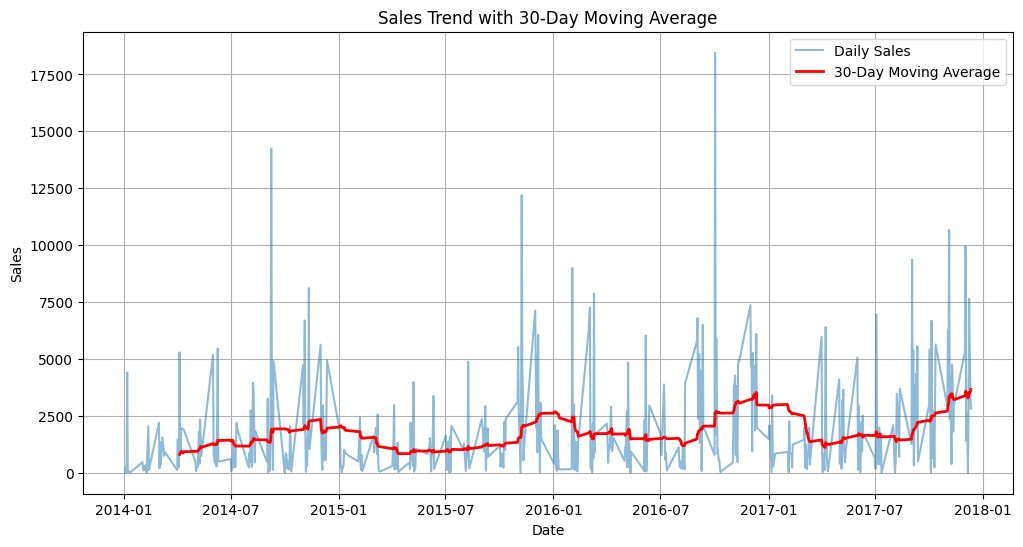

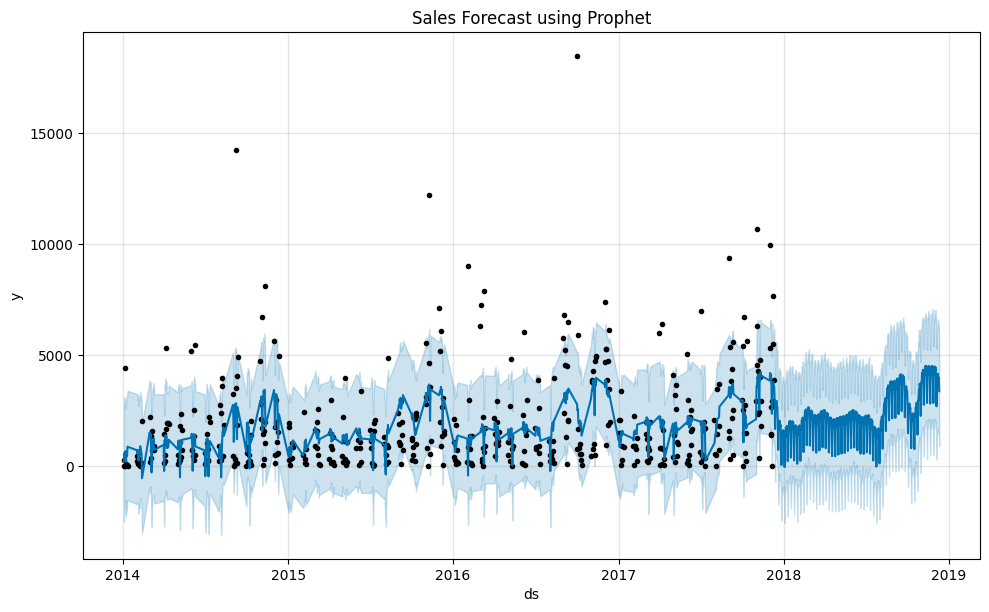

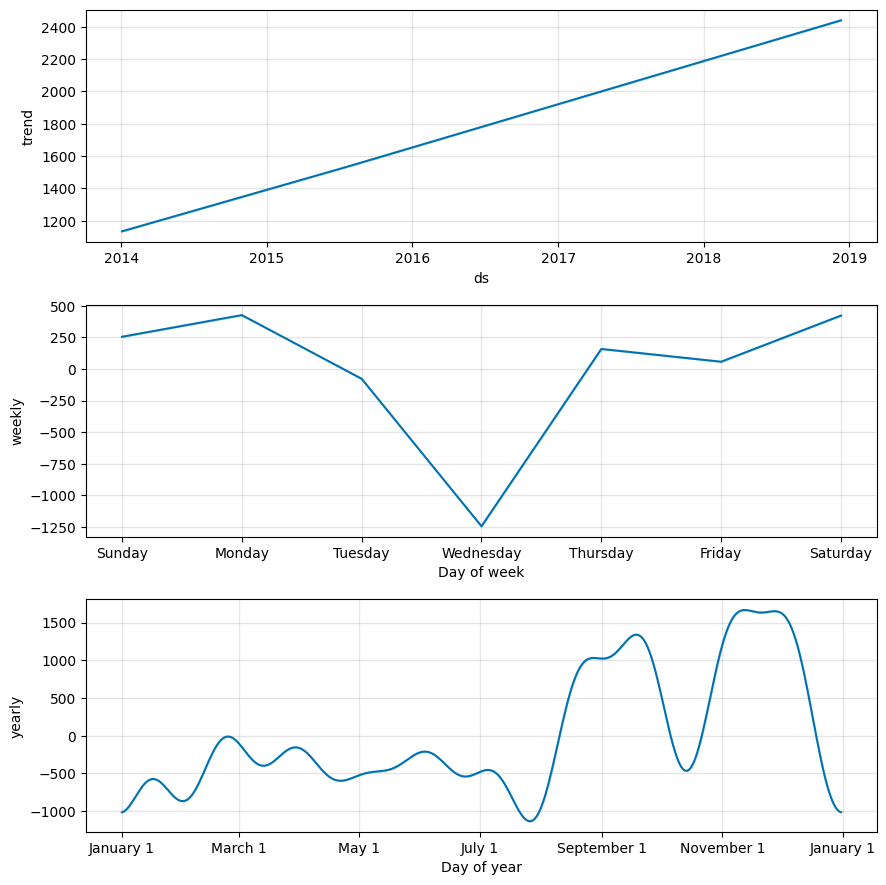

<ipython-input-4-220addc26310>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yoy_growth.index.astype(str), y=yoy_growth.values, palette="Blues_d")


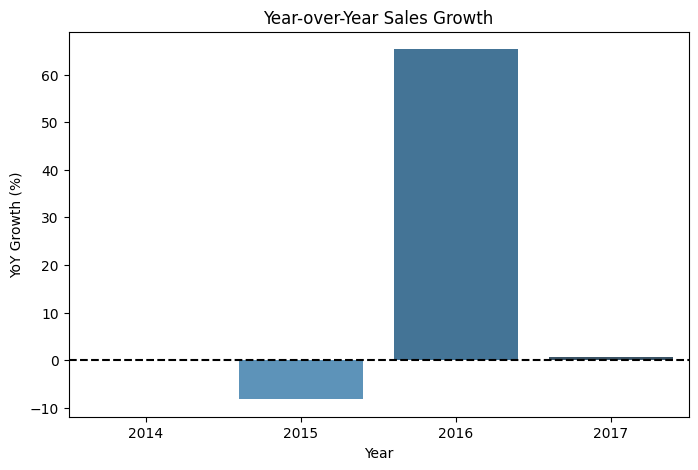

<ipython-input-4-220addc26310>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_ts['Month'], y=df_ts['y'], palette="coolwarm")


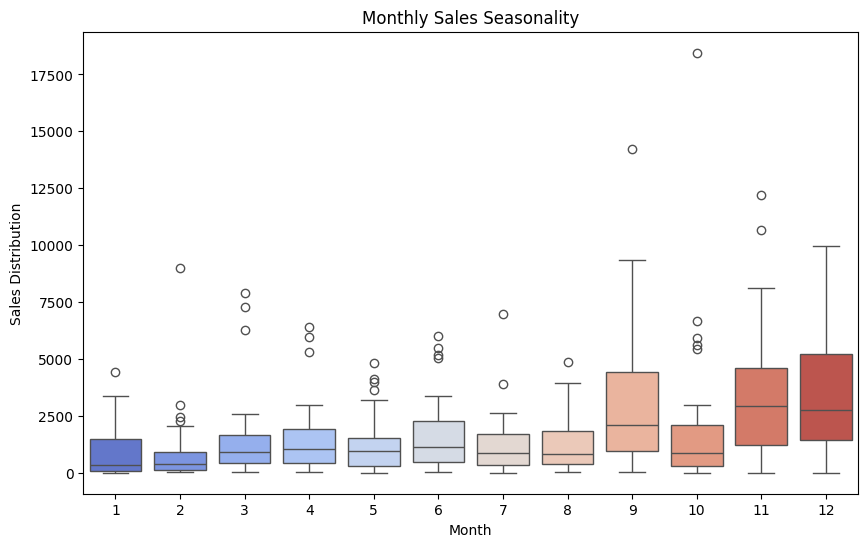

<ipython-input-4-220addc26310>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_ts['Weekday'], y=df_ts['y'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="viridis")


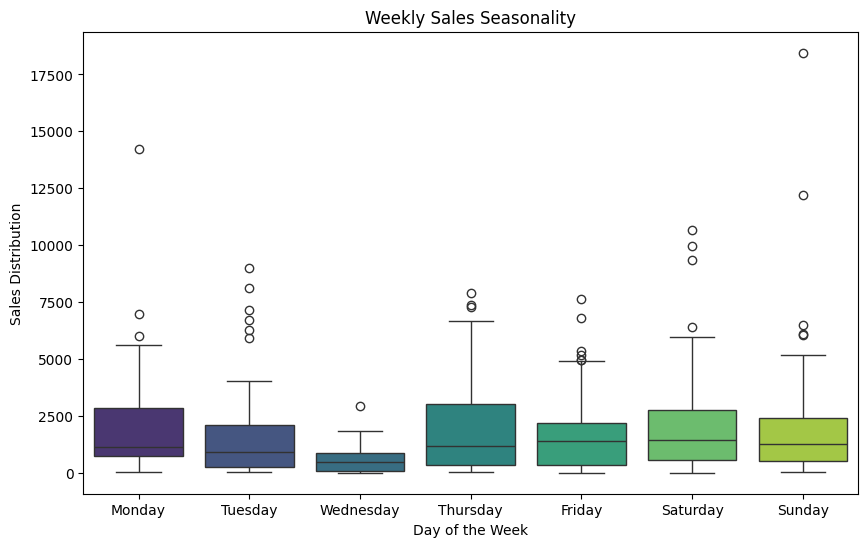

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load and Clean Data
file_path = "Superstore - store analysis.csv"  # Update with your file path
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['Order Date'])

# Aggregate sales by date
df_ts = df.groupby('Order Date')['Sales'].sum().reset_index()

# Rename columns for Prophet compatibility
df_ts.columns = ['ds', 'y']

# Moving Average for Smoother Trend Analysis
df_ts['MA_30'] = df_ts['y'].rolling(window=30).mean()

# Prophet Model Training
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(df_ts)

# Future Prediction
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Sales Trend with Moving Average
plt.figure(figsize=(12,6))
plt.plot(df_ts['ds'], df_ts['y'], label="Daily Sales", alpha=0.5)
plt.plot(df_ts['ds'], df_ts['MA_30'], label="30-Day Moving Average", color='red', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend with 30-Day Moving Average")
plt.legend()
plt.grid()
plt.show()

# Forecast with Prophet
fig1 = model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.show()

# Prophet Components: Trend & Seasonality
fig2 = model.plot_components(forecast)
plt.show()

# Year-over-Year Growth
df_ts['Year'] = df_ts['ds'].dt.year
yoy_growth = df_ts.groupby('Year')['y'].sum().pct_change() * 100

plt.figure(figsize=(8,5))
sns.barplot(x=yoy_growth.index.astype(str), y=yoy_growth.values, palette="Blues_d")
plt.xlabel("Year")
plt.ylabel("YoY Growth (%)")
plt.title("Year-over-Year Sales Growth")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

# Monthly Seasonality Boxplot
df_ts['Month'] = df_ts['ds'].dt.month

plt.figure(figsize=(10,6))
sns.boxplot(x=df_ts['Month'], y=df_ts['y'], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Sales Distribution")
plt.title("Monthly Sales Seasonality")
plt.show()

# Weekly Seasonality Boxplot
df_ts['Weekday'] = df_ts['ds'].dt.day_name()

plt.figure(figsize=(10,6))
sns.boxplot(x=df_ts['Weekday'], y=df_ts['y'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Sales Distribution")
plt.title("Weekly Sales Seasonality")
plt.show()